<a href="https://colab.research.google.com/github/CRISTIANJULIOCESAR/DANN/blob/main/dann_cv_shaps_global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob

def clear_previous_features(directory):
    # Eliminar todos los archivos .pkl en el directorio especificado
    files = glob.glob(os.path.join(directory, '*.pkl'))
    for f in files:
        try:
            os.remove(f)
            print(f'Eliminado: {f}')
        except Exception as e:
            print(f'No se pudo eliminar {f}. Error: {str(e)}')

# Directorio donde guardas las características
save_dir = "/content/drive/MyDrive/PANCANCER FINAL"

# Llamada a la función para limpiar los archivos previos
clear_previous_features(save_dir)


Eliminado: /content/drive/MyDrive/PANCANCER FINAL/feature_extractor_fc1_epoch0_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/domain_classifier_fc2_epoch0_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/label_predictor_fc2_epoch0_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/feature_extractor_fc1_epoch1_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/domain_classifier_fc2_epoch1_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/label_predictor_fc2_epoch1_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/feature_extractor_fc1_epoch2_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/domain_classifier_fc2_epoch2_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/label_predictor_fc2_epoch2_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/feature_extractor_fc1_epoch3_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/domain_classifier_fc2_epoch3_iter64.pkl
Eliminado: /cont

In [3]:
import os

# Obtener el número de núcleos
num_cores = os.cpu_count()
print(f"Número de núcleos de CPU: {num_cores}")


Número de núcleos de CPU: 12


In [4]:
import torch

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU en uso: {gpu_name}")
    print(f"Memoria total de la GPU: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")
else:
    print("No se encontró una GPU disponible.")


GPU en uso: NVIDIA L4
Memoria total de la GPU: 22.17 GB


In [5]:
!pip install umap-learn shap
!pytorch-lamb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.4 MB/s eta 0:00:00
/bin/bash: line 1: pytorch-lamb: command not found


In [6]:
import pandas as pd
clinicos = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/final/Pan Cancer/Validados/picklesnuevos/meta_sinFPPP.pkl')
clinicos

,Unnamed: 0,data_type,updated_datetime,file_name,md5sum,data_category,experimental_strategy,project,sample_uuid,sample_barcode,...,panel,histology,tissue_site,stage,T,N,M,residual_tumor,new_tumor_events,follow_ups
file_id,,,,,,,,,,,,,,,,,,,,,
9fe7d0f4-866d-490f-b2cb-d9be7da889de,7001,Gene Expression Quantification,2016-05-26T20:51:28.753650-05:00,1db2cfc5-346d-4398-9dd4-8b92435059fd.htseq.cou...,bff9318f04ad067bccc0fbd2d31b45f1,Transcriptome Profiling,RNA-Seq,TCGA,9259e9ee-7279-4b62-8512-509cb705029c,TCGA-DD-AAVP-01A,...,LIHC,Hepatocellular Carcinoma,Liver,Stage I,T1,N0,M0,R0,2.0,1.0
dd74434f-300f-4798-8342-aad31b192e12,8001,Gene Expression Quantification,2016-05-26T21:04:47.187859-05:00,5f4cf592-e135-43ff-9c11-bcba462626d3.htseq.cou...,92cf7b5b7f0a0f5dfa02919c586b72c7,Transcriptome Profiling,RNA-Seq,TCGA,bccb7f9d-8dde-45b7-a50d-6c7233239ceb,TCGA-KK-A7B2-01A,...,PRAD,Prostate Adenocarcinoma Acinar Type,Prostate,NaN,T3a,N1,NaN,R0,2.0,1.0
07db9e9d-059d-4e6c-b483-81517a492b96,1001,Gene Expression Quantification,2016-05-26T21:04:48.015693-05:00,aa4a76e4-5348-479c-8beb-3e4e34e18ce9.htseq.cou...,503fa39eb3a770b869ab0c4297fd0d43,Transcriptome Profiling,RNA-Seq,TCGA,03877fe0-b0d6-4800-be46-b45c70350e48,TCGA-DC-6158-01A,...,READ,Rectal Adenocarcinoma,Rectum,Stage I,T2,N0,M0,R0,3.0,2.0
47ee860a-fd18-48f2-bfe7-4e19391950bd,2001,Gene Expression Quantification,2016-05-26T21:04:48.692729-05:00,0c172934-64ff-44dc-bdba-4c738f5692ea.htseq.cou...,c61b88a22488a1a0d2fb3e7739db0b32,Transcriptome Profiling,RNA-Seq,TCGA,8d3e521b-6df4-4633-bb44-7647ded94130,TCGA-DD-A4NP-01A,...,LIHC,Hepatocellular Carcinoma,Liver,Stage I,T1,N0,M0,R0,3.0,2.0
e322b0e5-458a-4cbf-a64f-9b348e413939,5001,Gene Expression Quantification,2016-05-26T21:04:49.266949-05:00,3025ad45-1d29-4c05-b90f-3d4a348c82c6.htseq.cou...,d279845ef0505630cf5a2ee4b1be5cac,Transcriptome Profiling,RNA-Seq,TCGA,8fef5013-4e57-4043-8770-a56135aeac9b,TCGA-HQ-A5ND-01A,...,BLCA,Muscle invasive urothelial carcinoma (pT2 or a...,Bladder,Stage IV,T3b,N1,M0,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62cb41b1-8960-4fa2-8f74-38dd174af004,3999,Gene Expression Quantification,2016-06-01T23:31:30.205560-05:00,1ef78255-1b5c-42af-aa81-128c1b009114.htseq.cou...,4e139effd7c17a3b6f8c8a2dcf1ba2f5,Transcriptome Profiling,RNA-Seq,TCGA,f03d9b83-a4d7-4e77-abaa-5c3dbee0bcf3,TCGA-BP-4790-01A,...,KIRC,Kidney Clear Cell Renal Carcinoma,Kidney,Stage I,T1a,NX,M0,NaN,2.0,1.0
673a85f3-ba5e-448a-acee-dfec77b5238e,8000,Gene Expression Quantification,2016-06-01T23:31:30.867514-05:00,d07c7238-807f-48b1-bf06-deaa6200f4aa.htseq.cou...,b07dddd077d9db4f26b3e2ae066555c4,Transcriptome Profiling,RNA-Seq,TCGA,d90a2617-bf0b-453f-a483-ceac82781a6c,TCGA-N9-A4Q4-01A,...,UCS,Uterine Carcinosarcoma/ Malignant Mixed Muller...,Uterus,NaN,NaN,NaN,NaN,R0,1.0,0.0
3d93b2ae-7730-4914-af23-ff3554752922,9000,Gene Expression Quantification,2016-06-01T23:31:31.468195-05:00,3c5b65ad-998a-4124-814f-760de89f05d0.htseq.cou...,2046f591b06fa9eafb79d667f7942795,Transcriptome Profiling,RNA-Seq,TCGA,bf8e8426-dc44-40b0-8459-ad1dbaf9ba5a,TCGA-RY-A847-01A,...,LGG,Oligodendroglioma,Central nervous system,NaN,NaN,NaN,NaN,NaN,2.0,1.0


In [7]:
df = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/final/Pan Cancer/Validados/picklesnuevos/df_sinFPPP_2.pkl')
df

,5S_rRNA,5_8S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,...,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1,ZZZ3,hsa-mir-1253,hsa-mir-423,snoZ196
9fe7d0f4-866d-490f-b2cb-d9be7da889de,0,0,79,1055,12,3291,6614,11,0,0,...,5,0,557,3130,0,314,469,0,0,3
dd74434f-300f-4798-8342-aad31b192e12,1,0,1250,8,51,3,24510,55,120,0,...,73,0,963,10619,0,1656,1146,0,0,3
07db9e9d-059d-4e6c-b483-81517a492b96,0,0,41,2,35,1618,21227,29,1,0,...,5,0,2136,13793,0,3667,2641,0,0,3
47ee860a-fd18-48f2-bfe7-4e19391950bd,0,0,111,16482,328,10632,159168,124,1,0,...,66,0,3417,887,0,1822,1891,0,0,1
e322b0e5-458a-4cbf-a64f-9b348e413939,2,0,22,2,0,2,7488,18,1714,0,...,52,0,2155,13427,0,1404,2215,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62cb41b1-8960-4fa2-8f74-38dd174af004,3,0,52,14,76,2971,111008,92,6,0,...,28,0,3969,11102,0,4381,2584,0,0,1
673a85f3-ba5e-448a-acee-dfec77b5238e,3,0,169,40,142,4,25243,27,277,0,...,172,0,2717,14657,0,1090,2165,0,0,3
3d93b2ae-7730-4914-af23-ff3554752922,0,1,3961,10,54,3,32550,26,289,1,...,2,0,2568,4216,0,3239,908,0,0,1
85a0b88f-2b89-4117-9e04-b81fad7f2e1b,9,1,1003,90,272,0,331,96,55,0,...,10,0,1611,19604,0,7247,3970,0,0,13


In [8]:
clinicos = clinicos.dropna(subset=['vital'])
clinicos = clinicos.dropna(subset=['panel'])

In [9]:
df['vital'] = clinicos['vital']
df['panel'] = clinicos['panel']

In [10]:
df = df.dropna(subset=['vital'])
df = df.dropna(subset=['panel'])

In [11]:
clinicos['panel'].unique()

array(['LIHC', 'PRAD', 'READ', 'BLCA', 'LGG', 'BRCA', 'UCEC', 'SARC',
       'KIRC', 'PCPG', 'DLBC', 'MESO', 'THYM', 'LUSC', 'LUAD', 'STAD',
       'GBM', 'LAML', 'THCA', 'CESC', 'COAD', 'HNSC', 'UVM', 'SKCM',
       'PAAD', 'OV', 'TGCT', 'KICH', 'ESCA', 'KIRP', 'ACC', 'CHOL', 'UCS'],
      dtype=object)

In [12]:
df

,5S_rRNA,5_8S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,...,ZYG11B,ZYX,ZYXP1,ZZEF1,ZZZ3,hsa-mir-1253,hsa-mir-423,snoZ196,vital,panel
9fe7d0f4-866d-490f-b2cb-d9be7da889de,0,0,79,1055,12,3291,6614,11,0,0,...,557,3130,0,314,469,0,0,3,Alive,LIHC
dd74434f-300f-4798-8342-aad31b192e12,1,0,1250,8,51,3,24510,55,120,0,...,963,10619,0,1656,1146,0,0,3,Alive,PRAD
07db9e9d-059d-4e6c-b483-81517a492b96,0,0,41,2,35,1618,21227,29,1,0,...,2136,13793,0,3667,2641,0,0,3,Dead,READ
47ee860a-fd18-48f2-bfe7-4e19391950bd,0,0,111,16482,328,10632,159168,124,1,0,...,3417,887,0,1822,1891,0,0,1,Alive,LIHC
e322b0e5-458a-4cbf-a64f-9b348e413939,2,0,22,2,0,2,7488,18,1714,0,...,2155,13427,0,1404,2215,0,0,4,Dead,BLCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62cb41b1-8960-4fa2-8f74-38dd174af004,3,0,52,14,76,2971,111008,92,6,0,...,3969,11102,0,4381,2584,0,0,1,Dead,KIRC
673a85f3-ba5e-448a-acee-dfec77b5238e,3,0,169,40,142,4,25243,27,277,0,...,2717,14657,0,1090,2165,0,0,3,Alive,UCS
3d93b2ae-7730-4914-af23-ff3554752922,0,1,3961,10,54,3,32550,26,289,1,...,2568,4216,0,3239,908,0,0,1,Alive,LGG
85a0b88f-2b89-4117-9e04-b81fad7f2e1b,9,1,1003,90,272,0,331,96,55,0,...,1611,19604,0,7247,3970,0,0,13,Alive,LAML


Usando dispositivo: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 5000]     199,900,000
       BatchNorm1d-2                 [-1, 5000]          10,000
           Dropout-3                 [-1, 5000]               0
  FeatureExtractor-4                 [-1, 5000]               0
            Linear-5                 [-1, 5000]      25,005,000
       BatchNorm1d-6                 [-1, 5000]          10,000
           Dropout-7                 [-1, 5000]               0
            Linear-8                 [-1, 5000]      25,005,000
       BatchNorm1d-9                 [-1, 5000]          10,000
          Dropout-10                 [-1, 5000]               0
           Linear-11                    [-1, 1]           5,001
   LabelPredictor-12                    [-1, 1]               0
           Linear-13                 [-1, 5000]      25,005,000
      BatchNor

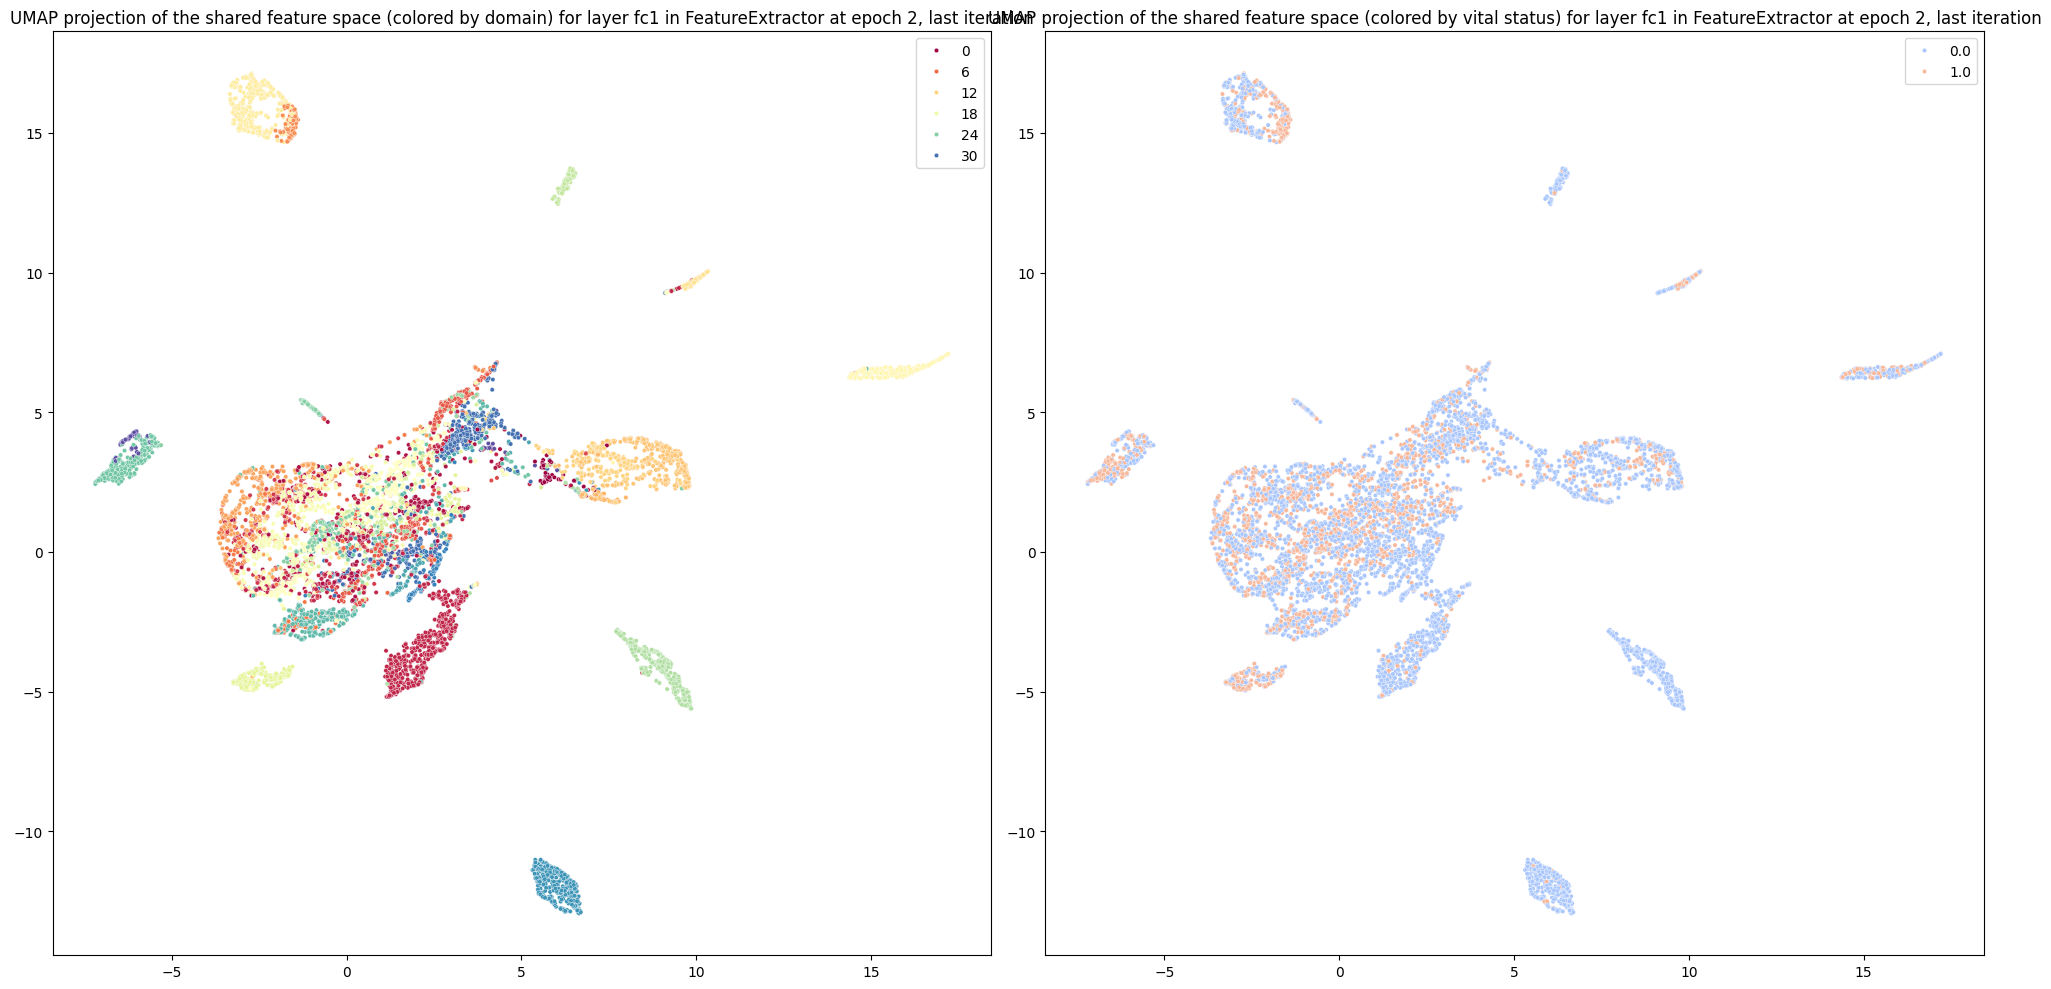

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from torchsummary import summary  # Importar torchsummary para imprimir el resumen del modelo

# Configurar el dispositivo para GPU si está disponible, de lo contrario, usar CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%) de forma estratificada
X_train, X_test, Y_train, Y_test, panels_train, panels_test = train_test_split(
    X, Y, panels, test_size=0.2, stratify=Y, random_state=42
)

# Sobrescribir X y Y con los datos de entrenamiento
X = X_train
Y = Y_train
panels = panels_train


# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Codificar las etiquetas de dominio (paneles)
label_encoder_panel = LabelEncoder()
panels = label_encoder_panel.fit_transform(panels)

# Convertir los datos a tensores y moverlos al dispositivo
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
panels_tensor = torch.tensor(panels, dtype=torch.long).to(device)

# Crear datasets y dataloaders
batch_size = 128
dataset = TensorDataset(X_tensor, Y_tensor, panels_tensor)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Definición del modelo DANN mejorado
class FeatureExtractor(nn.Module):
    def __init__(self, input_dim):
        super(FeatureExtractor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 5000)  # Capa única con 10,000 neuronas
        self.bn1 = nn.BatchNorm1d(5000)
        self.dropout1 = nn.Dropout(0.3)  # Dropout moderado

        # Aplicar inicialización He a la capa
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')

    def forward(self, x, lambda_=1.0):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        return x

class LabelPredictor(nn.Module):
    def __init__(self, input_dim):
        super(LabelPredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 5000)
        self.bn1 = nn.BatchNorm1d(5000)
        self.dropout1 = nn.Dropout(0.3)  # Dropout moderado
        self.fc2 = nn.Linear(5000, 5000)
        self.bn2 = nn.BatchNorm1d(5000)
        self.dropout2 = nn.Dropout(0.3)  # Dropout moderado
        self.fc3 = nn.Linear(5000, 1)

        # Aplicar inicialización He a las capas
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

class DomainClassifier(nn.Module):
    def __init__(self, input_dim, num_domains):
        super(DomainClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 5000)
        self.bn1 = nn.BatchNorm1d(5000)
        self.dropout1 = nn.Dropout(0.9)  # Dropout moderado
        self.fc2 = nn.Linear(5000, 5000)
        self.bn2 = nn.BatchNorm1d(5000)
        self.dropout2 = nn.Dropout(0.9)  # Dropout moderado
        self.fc3 = nn.Linear(5000, num_domains)

        # Aplicar inicialización He a las capas
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

class DANN(nn.Module):
    def __init__(self, feature_dim, num_domains):
        super(DANN, self).__init__()
        self.feature_extractor = FeatureExtractor(feature_dim)
        self.label_predictor = LabelPredictor(5000)
        self.domain_classifier = DomainClassifier(5000, num_domains)

    def forward(self, x, lambda_=1.0):
        # Extracción de características
        features = self.feature_extractor(x)

        # Inversión de gradiente con lambda
        reverse_features = ReverseLayerF.apply(features, lambda_)

        # Predicción de etiquetas
        label_output = self.label_predictor(features)

        # Clasificación de dominio
        domain_output = self.domain_classifier(reverse_features)

        return label_output, domain_output, features

class ReverseLayerF(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lambda_):
        ctx.lambda_ = lambda_  # Guardamos lambda para usarla en la retropropagación
        return x.view_as(x)  # Devolvemos las características sin cambios

    @staticmethod
    def backward(ctx, grad_output):
        # Invertimos los gradientes y los escalamos por lambda
        output = grad_output.neg() * ctx.lambda_
        return output, None  # Retornamos el gradiente invertido

# Función para listar las capas de un módulo
def list_module_layers(module, module_name):
    print(f"Capas disponibles en {module_name}:")
    for name, mod in module.named_children():
        print(f'Layer name: {name}, Module: {mod}')

# Función para extraer características de una capa específica de un módulo
def extract_layer_features(model, loader, module_name, layer_name, use_features=False):
    model.eval()
    features = []
    labels = []
    domains = []

    with torch.no_grad():
        for inputs, label, domain in loader:
            inputs, label, domain = inputs.to(device), label.to(device), domain.to(device)
            if use_features:
                x = model.feature_extractor(inputs)
            else:
                x = inputs
            module = getattr(model, module_name)
            for name, mod in module.named_children():
                x = mod(x)
                if name == layer_name:
                    break
            features.append(x.cpu().numpy())
            labels.append(label.cpu().numpy())
            domains.append(domain.cpu().numpy())

    features = np.concatenate(features, axis=0)
    labels = np.concatenate(labels, axis=0).flatten()
    domains = np.concatenate(domains, axis=0).flatten()
    return features, labels, domains

# Función para guardar características de una capa específica de un módulo en disco
def save_layer_features_to_disk(epoch_iter, model, loader, module_name, layer_name, use_features=False):
    features, labels, domains = extract_layer_features(model, loader, module_name, layer_name, use_features)

    # Crear un directorio para guardar las características si no existe
    save_dir = "/content/drive/MyDrive/PANCANCER FINAL"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Guardar las características en disco
    file_name = f"{save_dir}/{module_name}_{layer_name}_epoch{epoch_iter[0]}_iter{epoch_iter[1]}.pkl"
    with open(file_name, 'wb') as f:
        pickle.dump((features, labels, domains), f)

# Función para cargar características desde disco
def load_layer_features_from_disk(epoch, iteration, module_name, layer_name):
    file_name = f"/content/drive/MyDrive/PANCANCER FINAL/{module_name}_{layer_name}_epoch{epoch}_iter{iteration}.pkl"
    if os.path.exists(file_name):
        with open(file_name, 'rb') as f:
            features, labels, domains = pickle.load(f)
        return features, labels, domains
    else:
        print(f"No features found for epoch {epoch}, iteration {iteration}, module {module_name}, layer {layer_name}")
        return None, None, None

# Función para visualizar UMAP
def plot_umap(embedding, labels, domains, title_suffix=''):
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=domains, palette='Spectral', s=10)
    plt.title(f'UMAP projection of the shared feature space (colored by domain) {title_suffix}')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette='coolwarm', s=10)
    plt.title(f'UMAP projection of the shared feature space (colored by vital status) {title_suffix}')

    plt.tight_layout()
    torch.cuda.synchronize()
    plt.show()

# Función para visualizar UMAP de una capa específica en una época e iteración específica
def visualize_layer_umap(epoch, iteration, module_name, layer_name, title_suffix=''):
    features, labels, domains = load_layer_features_from_disk(epoch, iteration, module_name, layer_name)
    if features is not None:
        reducer = umap.UMAP(n_components=2)
        embedding = reducer.fit_transform(features)
        plot_umap(embedding, labels, domains, title_suffix)

# Parámetros
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
num_epochs = 10

# Crear el modelo
model = DANN(input_dim, num_domains).to(device)

# Imprimir el resumen de la arquitectura del modelo usando torchsummary
summary(model, input_size=(input_dim,))

# Después de llamar a summary, puedes ajustar el lambda_ durante el entrenamiento
lambda_ = 0.2 # Valor ajustado por el usuario

# Definir el optimizador AdamW
optimizer = optim.AdamW(
    model.parameters(),
    lr=0.01,  # Tasa de aprendizaje
    betas=(0.9, 0.99),  # Coeficientes beta
    eps=1e-8,  # Valor pequeño para estabilidad numérica
    weight_decay=0.01,  # Regularización L2
    amsgrad=False  # Si deseas usar la variante AMSGrad
)

# Definir las funciones de pérdida
criterion_label = nn.BCELoss().to(device)
criterion_domain = nn.CrossEntropyLoss().to(device)

# Listas para guardar las precisiones
label_accuracies = []
domain_accuracies = []


class ModelSaver:
    def __init__(self):
        self.models = []

    def save_model(self, model, iteration):
        # Hacer una copia del estado del modelo
        model_copy = {k: v.clone() for k, v in model.state_dict().items()}
        self.models.append((iteration, model_copy))

    def get_models(self):
        return self.models
# Crear instancia de ModelSaver
model_saver = ModelSaver()



# Entrenamiento y guardado de características
for epoch in range(num_epochs):
    model.train()
    correct_label = 0
    correct_domain = 0
    total = 0

    for i, (inputs, labels, domains) in enumerate(loader):
        inputs, labels, domains = inputs.to(device), labels.to(device), domains.to(device)

        # Forward pass: obtiene las predicciones para etiquetas y dominios
        label_preds, domain_preds, features = model(inputs, lambda_)  # El valor de lambda_ es proporcionado aquí

        # Cálculo de pérdidas
        loss_label = criterion_label(label_preds, labels)  # Pérdida de predicción de etiquetas (L_y)
        loss_domain = criterion_domain(domain_preds, domains)  # Pérdida de predicción de dominios (L_d)

        # Reseteo de gradientes acumulados
        optimizer.zero_grad()

        # Suma de las pérdidas de ambas tareas
        loss = loss_label #+ loss_domain

        # Retropropagación de gradientes (aquí es donde ocurren ambas retropropagaciones)
        loss.backward()

        # Clip gradients to prevent explosion
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Actualización de los parámetros del modelo
        optimizer.step()

        predicted_label = (label_preds > 0.5).float()
        correct_label += (predicted_label == labels).sum().item()

        _, predicted_domain = torch.max(domain_preds, 1)
        correct_domain += (predicted_domain == domains).sum().item()

        total += labels.size(0)

        # Guardar características solo para la última iteración dentro de cada época
        if i == len(loader) - 1:  # Solo para la última iteración
            save_layer_features_to_disk((epoch, i), model, loader, 'feature_extractor', 'fc1')
            save_layer_features_to_disk((epoch, i), model, loader, 'domain_classifier', 'fc2', use_features=True)
            save_layer_features_to_disk((epoch, i), model, loader, 'label_predictor', 'fc2', use_features=True)



            # Guardar el modelo después de cada iteración (en este caso la ulitima iteración)
            model_saver.save_model(model, (epoch, i))



    label_accuracy = correct_label / total
    domain_accuracy = correct_domain / total

    label_accuracies.append(label_accuracy)
    domain_accuracies.append(domain_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Label Accuracy: {label_accuracy:.4f}, Domain Accuracy: {domain_accuracy:.4f}')

# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=1, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc1 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=1, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=1, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


In [ ]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


In [ ]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


In [ ]:
# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 5 es epoch 4

# Obtener el modelo guardado al final de la época 5
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
from sklearn.model_selection import train_test_split


# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Definir el número de pliegues
n_splits = 10  # Número de pliegues para la validación cruzada
skf = StratifiedKFold(n_splits=n_splits)

# Listas para almacenar resultados de AUC
auc_scores = []
fpr_list = []
tpr_list = []

# Validación cruzada estratificada
for fold, (train_index, test_index) in enumerate(skf.split(X, Y)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Convertir a tensores
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1).to(device)

    # Evaluar el modelo en el conjunto de prueba
    model.eval()
    with torch.no_grad():
        label_preds, _, _ = model(X_test_tensor)
        label_preds = label_preds.cpu().numpy()
        Y_test = Y_test_tensor.cpu().numpy()

    # Calcular el AUC
    auc_score = roc_auc_score(Y_test, label_preds)
    auc_scores.append(auc_score)

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(Y_test, label_preds)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    print(f"AUC for fold {fold + 1}: {auc_score:.4f}")

# Promediar y graficar las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(n_splits):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {auc_scores[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Label Predictor across Folds')
plt.legend(loc="lower right")
plt.show()


In [ ]:
X_tensor.shape

**Analysis of the Model Outputs:**

The result you obtained confirms that the wrapper (`ModelWrapper`) is functioning correctly to return only the first output of the model, which corresponds to the vital status prediction. Below is the analysis of the results:

1. **Outputs of the model without the wrapper:**
   - **First output:** `tensor([[4.6149e-02], ... , [6.9630e-02]], device='cuda:0')` with dimension `[10286, 1]` corresponds to the vital status prediction (`LabelPredictor`).
   - **Second output:** `tensor([[-0.2760,  0.1515, ...]], device='cuda:0')` with dimension `[10286, 33]` corresponds to the domain prediction (`DomainClassifier`).
   - **Third output:** `tensor([[ 2.3175e-01, ...]], device='cuda:0')` with dimension `[10286, 5000]` corresponds to some intermediate representation or features from the feature extractor (`FeatureExtractor`).

2. **Output of the model with the wrapper:**
   - **Output:** `tensor([[4.6149e-02], ... , [6.9630e-02]], device='cuda:0')` with dimension `[10286, 1]` corresponds to the first output of the model, which is the vital status prediction, as expected.

**Conclusion:**

The wrapper `ModelWrapper` is functioning as intended, returning only the first output of the full model, which is the vital status prediction. This is confirmed by comparing the dimensions:

- **Dimensions of all outputs:**
  - **First output:** `[10286, 1]`
  - **Second output:** `[10286, 33]`
  - **Third output:** `[10286, 5000]`

- **Dimension of the wrapped output:**
  - `[10286, 1]`

The dimension `[10286, 1]` of the wrapped output matches the dimension of the vital status prediction, confirming that the wrapper is correctly returning the first output.

This behavior ensures that when you calculate SHAP values using the wrapper, you are calculating SHAP values with respect to the vital status prediction (and not the other outputs of the model). This is exactly what you need to analyze how the input features influence the vital status prediction in your DANN model.




In [ ]:
asdasdasdasdasdasd

In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
print(X_tensor.shape)

# Supongamos que la época 10 es la que te interesa (indexada como 9 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Obtener la salida del modelo
output = model(X_tensor)

# Si el modelo devuelve una tupla, selecciona la primera salida
if isinstance(output, tuple):
    output = output[0]

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(model, X_tensor)
shap_values = explainer.shap_values(X_tensor)
print(shap_values.shape)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Paso 1: Crear un objeto DeepExplainer para el modelo
explainer = shap.DeepExplainer(model.label_predictor, X_tensor)

# Paso 2: Calcular los valores SHAP utilizando el tensor de entrada X_tensor
shap_values = explainer.shap_values(X_tensor)

# Paso 3: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Verifica las dimensiones de shap_values para asegurarte de que coincide con lo esperado
print("Dimensión de shap_values:", shap_values_np.shape)

# Paso 4: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Verificar las salidas del modelo sin el wrapper
with torch.no_grad():
    all_outputs = model(X_tensor)
    print("Salidas del modelo (sin wrapper):", all_outputs)
    print("Dimensiones de todas las salidas:", [output.shape for output in all_outputs])

# Crear una clase wrapper para el modelo
# Esta clase `ModelWrapper` envuelve el modelo completo, pero en la función `forward`
# devuelve solo la primera salida del modelo (que corresponde a la predicción del estado vital).
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida (la predicción de la etiqueta de vitalidad)

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Verificar la salida del modelo con el wrapper
with torch.no_grad():
    wrapped_output = wrapped_model(X_tensor)
    print("Salida del modelo (con wrapper):", wrapped_output)
    print("Dimensión de la salida envuelta:", wrapped_output.shape)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.DeepExplainer(wrapped_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Verifica las dimensiones de shap_values para asegurarte de que coincide con lo esperado
print("Dimensión de shap_values:", shap_values_np.shape)

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)



In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)

In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para el modelo
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(wrapped_model, X_tensor,batch_size = 150)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
sdasdasdasdasdasdasdasd

In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para el modelo
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(wrapped_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch

# Asumiendo que el modelo DANN ya ha sido definido y entrenado

# Instanciar y cargar el modelo como se hace en el código original
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
model = DANN(input_dim, num_domains).to(device)

# Cargar el modelo guardado al final de una época en particular
epoch_of_interest = 9  # Ejemplo, puedes ajustar la época de interés
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
model.load_state_dict(model_state_dict)

# Asegurarse de que el modelo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para obtener solo la salida del LabelPredictor
class LabelPredictorWrapper(torch.nn.Module):
    def __init__(self, model):
        super(LabelPredictorWrapper, self).__init__()
        self.label_predictor = model.label_predictor

    def forward(self, x):
        return self.label_predictor(x)

# Instanciar el wrapper
label_predictor_model = LabelPredictorWrapper(model)

# Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(label_predictor_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Visualización de SHAP
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:

# Paso 2: Usar GradientExplainer para calcular los valores SHAP
explainer = shap.GradientExplainer(label_predictor_model,X)
shap_values = explainer.shap_values(X)

# Paso 3: Convertir los tensores de entrada y los valores SHAP a numpy para visualización
features_np = X.cpu().numpy()
shap_values_np = np.array(shap_values).squeeze()

# Paso 4: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, features_np, feature_names=df.iloc[:, :-2].columns)

In [ ]:
features_np.shape

In [ ]:
len(df.iloc[:, :-2].columns)

In [ ]:
shap.summary_plot(shap_values_np, features_np, feature_names=df.iloc[:, :-2].columns,max_display=50 )


In [ ]:
shap_values_np.shape

In [ ]:

pd.DataFrame(shap_values_np, columns=df.iloc[:, :-2].columns,index=df.index)